


#### The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
import pandas as pd

from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

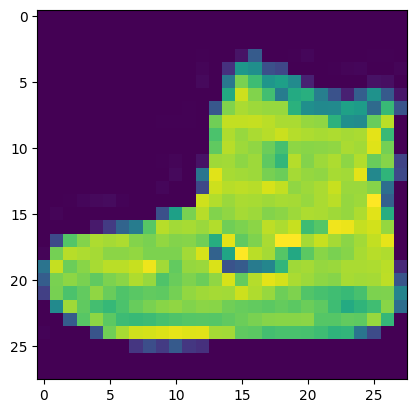

In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [5]:
from tensorflow.keras.utils import to_categorical
# Convertir las etiquetas a formato one-hot
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [7]:
model = Sequential()

# Capa Convolucional
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
# Capa de Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar las imágenes antes de las capas densas
model.add(Flatten())

# Capa Densa con 128 neuronas
model.add(Dense(128, activation='relu'))

# Capa de salida con 10 neuronas (una para cada clase)
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [10]:
model.fit(x_train, y_cat_train, epochs=100, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8059 - loss: 0.5488 - val_accuracy: 0.8747 - val_loss: 0.3434
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.8979 - loss: 0.2838 - val_accuracy: 0.8913 - val_loss: 0.3087
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9109 - loss: 0.2445 - val_accuracy: 0.8931 - val_loss: 0.2932
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9225 - loss: 0.2076 - val_accuracy: 0.8973 - val_loss: 0.2916
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9321 - loss: 0.1845 - val_accuracy: 0.9063 - val_loss: 0.2725
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9396 - loss: 0.1638 - val_accuracy: 0.9037 - val_loss: 0.2849
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9463 - loss: 0.1464 - val_accuracy: 0.9077 - val_loss: 0.2952


### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [11]:
losses = pd.DataFrame(model.history.history)
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.855383,0.406892,0.8747,0.343428
1,0.899550,0.278456,0.8913,0.308683
2,0.913767,0.237108,0.8931,0.293185
3,0.923733,0.208647,0.8973,0.291632
4,0.930917,0.187303,0.9063,0.272462


<Axes: >

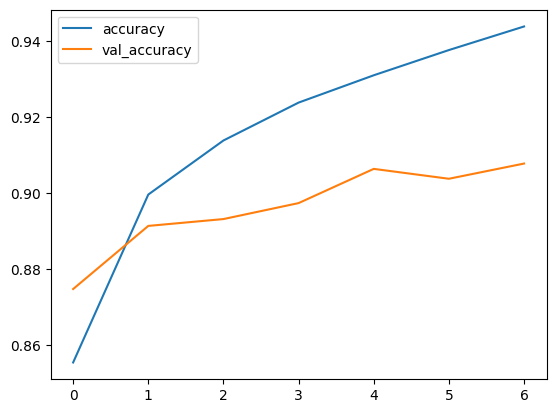

In [12]:
losses[["accuracy", "val_accuracy"]].plot()

<Axes: >

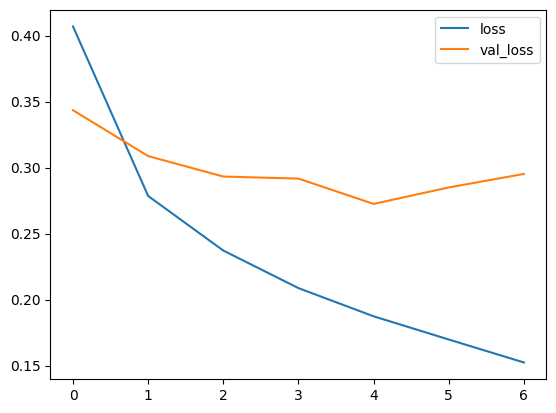

In [13]:
losses[["loss", "val_loss"]].plot()

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([9, 2, 1, ..., 8, 1, 5])

<Axes: >

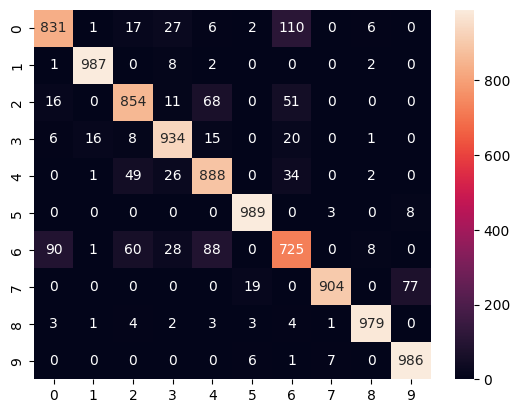

In [15]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d")